In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data = pd.read_csv("beer_reviews.csv")

In [4]:
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
data.shape

(1586614, 13)

In [6]:
data.isna()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,False,False,False,False,False,False,False,False,False,False,False,False,False
1586610,False,False,False,False,False,False,False,False,False,False,False,False,False
1586611,False,False,False,False,False,False,False,False,False,False,False,False,False
1586612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [8]:
data.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [12]:
data['beer_style'].value_counts()

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: count, Length: 104, dtype: int64

In [22]:
data[data['beer_abv'].isna()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586568,14359,The Defiant Brewing Company,1187052567,4.0,3.5,4.0,maddogruss,Bock,4.0,4.0,Bock,NaN,36424
1586587,14359,The Defiant Brewing Company,1177842168,3.5,4.5,4.0,BBM,Maibock / Helles Bock,4.5,4.0,Maibock,NaN,36555
1586596,14359,The Defiant Brewing Company,1287951067,4.0,3.0,5.0,hoppymcgee,Belgian Strong Pale Ale,4.0,3.5,Resolution #2,NaN,48360
1586597,14359,The Defiant Brewing Company,1241906223,4.5,4.5,4.0,WesWes,Belgian Strong Pale Ale,4.0,4.0,Resolution #2,NaN,48360


Which brewery produces the strongest beers by abv?

In [26]:
data.groupby("brewery_name")['beer_abv'].max().sort_values(ascending=False)

brewery_name
Schorschbräu                                                  57.7
BrewDog                                                       41.0
De Struise Brouwers                                           39.0
Hair of the Dog Brewing Company / Brewery and Tasting Room    29.0
Boston Beer Company (Samuel Adams)                            27.0
                                                              ... 
Yellow Rose Brewing Company                                    NaN
Yozgut Bira Fabrikasi / Tekel Birasi                           NaN
Yuiga Doxon Ji Beer                                            NaN
Zea Rotisserie & Brewery                                       NaN
Zerodegrees Bristol                                            NaN
Name: beer_abv, Length: 5742, dtype: float64

In [27]:
data.groupby("brewery_name")['beer_abv'].max().dropna().sort_values(ascending=False)

brewery_name
Schorschbräu                                                  57.7
BrewDog                                                       41.0
De Struise Brouwers                                           39.0
Hair of the Dog Brewing Company / Brewery and Tasting Room    29.0
Boston Beer Company (Samuel Adams)                            27.0
                                                              ... 
Portsmouth Brewing Co. / Mault's Brewpub                       3.0
Braumanufaktur Forsthaus Templin                               3.0
Shandong Taishan Beer Co Ltd                                   2.5
Borodino ZAO                                                   1.2
All Stars Bakery                                               0.5
Name: beer_abv, Length: 5155, dtype: float64

In [10]:
data[data['brewery_name']=="Schorschbräu"]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
12909,6513,Schorschbräu,1159979389,3.5,3.5,4.0,Bierman9,Munich Dunkel Lager,3.5,3.5,Schorschbräu Dunkles,4.90,32973
12910,6513,Schorschbräu,1316711123,3.5,3.5,4.0,skypup,Eisbock,2.5,2.5,Schorschbock Ice 13,13.00,73357
12911,6513,Schorschbräu,1283880857,4.0,3.5,3.0,hotzenklotz,Doppelbock,3.5,4.0,Schorschbock,16.00,47421
12912,6513,Schorschbräu,1262984846,3.5,3.0,3.0,Absumaster,Doppelbock,3.0,3.5,Schorschbock,16.00,47421
12913,6513,Schorschbräu,1256279422,4.0,3.5,3.0,Namako,Doppelbock,3.0,4.0,Schorschbock,16.00,47421
12914,6513,Schorschbräu,1161739451,3.5,3.5,4.0,rebel1771,Doppelbock,3.5,4.0,Schorschbräu Donner Bock,13.00,15578
12915,6513,Schorschbräu,1240328107,3.0,3.0,5.0,TheSarge,Doppelbock,3.0,3.5,Schorschbock,16.00,47421
12916,6513,Schorschbräu,1232508674,2.5,2.5,2.5,BlackHaddock,Doppelbock,2.5,2.5,Schorschbock,16.00,47421
12917,6513,Schorschbräu,1310586630,4.0,3.5,2.5,MTNboy,Weizenbock,4.0,4.0,Schorsch Weizen 16%,16.00,71004
12918,6513,Schorschbräu,1248785936,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 31%,30.86,51466


If you had to pick 3 beers to recommend to someone, how would you approach the problem?

I would ask a few questions to gain some insights from an interviewee. I would ask how much that person knows about beers, so I can find out whether to focus on detailed or general search. Starting with determining categorical variables (beer style). As a person is able to narrow down the choices in regard to its type, I can then shift towards either detailed characterstics (aroma, palate) of beers, if a person is a connoisseur. Or more general approach where I would simplify it to the general review.

What are the factors that impacts the quality of beer the most?

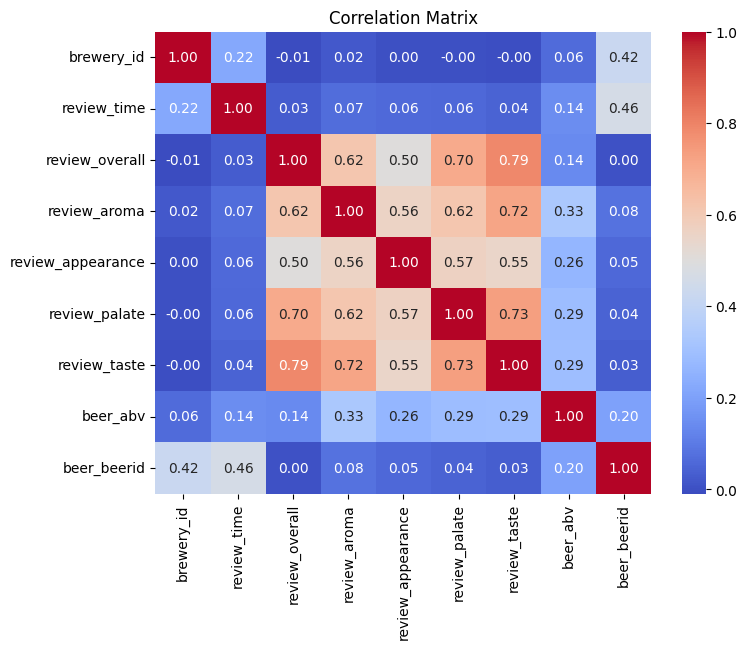

In [13]:
corr_matrix = data.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
data.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [23]:
X = data[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']]  # Independent variables
y = data['review_overall']        # Dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X,missing='drop').fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 6.164e+05
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:54:00   Log-Likelihood:            -8.0884e+05
No. Observations:             1518829   AIC:                         1.618e+06
Df Residuals:                 1518823   BIC:                         1.618e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5195      0.00

Beer taste is the most influential on an overall review. The second most influential factor is beers' palate. 

In [62]:
import pandas as pd

# Group by 'beer_style' to calculate the mean of 'review_aroma' and 'review_appearance'
style_characteristics = data.groupby("beer_style")[["review_aroma", "review_appearance"]].mean()

# Group by both 'beer_style' and 'beer_name' to calculate the mean of 'review_aroma' and 'review_appearance'
mean_reviews = data.groupby(["beer_style", "beer_name"])[["review_aroma", "review_appearance"]].mean()

# Drop NaN rows
mean_reviews_cleaned = mean_reviews.dropna()

# Merge the mean reviews with style characteristics
merged = mean_reviews_cleaned.reset_index().merge(style_characteristics.reset_index(), on="beer_style", suffixes=('_beer', '_style'))

merged #.groupby(['beer_style', 'beer_name'])


,beer_style,beer_name,review_aroma_beer,review_appearance_beer,review_aroma_style,review_appearance_style
0,Altbier,"""Alt""ered State",3.750000,4.000000,3.624015,3.809327
1,Altbier,"""Nein Toll Bier"" German Alt",4.000000,3.500000,3.624015,3.809327
2,Altbier,'Sconnie Rustic Trail Amber,3.250000,3.000000,3.624015,3.809327
3,Altbier,(512) Alt,3.818182,3.772727,3.624015,3.809327
4,Altbier,2010 Cleveland Beer Week Collaboration Altbier...,3.200000,3.100000,3.624015,3.809327
...,...,...,...,...,...,...
58887,Witbier,ZomerWit,2.000000,2.500000,3.640876,3.686695
58888,Witbier,Zomerbier,3.772727,3.727273,3.640876,3.686695
58889,Witbier,Zomewhit,4.000000,4.000000,3.640876,3.686695
58890,Witbier,Zon Jager Wit,4.000000,4.000000,3.640876,3.686695


In [63]:
# Calculate the absolute difference between the beer's ratings and the style's average ratings
merged['aroma_diff'] = abs(merged['review_aroma_beer'] - merged['review_aroma_style'])
merged['appearance_diff'] = abs(merged['review_appearance_beer'] - merged['review_appearance_style'])


merged['combined_diff'] = merged['aroma_diff'] + merged['appearance_diff']

sorted_beers = merged.sort_values(by='combined_diff')

In [64]:
sorted_beers

,beer_style,beer_name,review_aroma_beer,review_appearance_beer,review_aroma_style,review_appearance_style,aroma_diff,appearance_diff,combined_diff
29488,Dubbel,JP (2009),3.900000,4.000000,3.900390,4.000000,0.000390,0.000000,0.000390
17932,American Porter,Brooklyn Smoked Porter,3.833333,3.958333,3.836470,3.957396,0.003137,0.000937,0.004074
1785,American Amber / Red Ale,Ausable Wulff Red Ale,3.625000,3.812500,3.627254,3.810190,0.002254,0.002310,0.004564
3782,American Amber / Red Ale,Witch City Red,3.625000,3.812500,3.627254,3.810190,0.002254,0.002310,0.004564
7395,American Dark Wheat Ale,Black Wheat,3.500000,3.666667,3.499660,3.671088,0.000340,0.004422,0.004762
...,...,...,...,...,...,...,...,...,...
2539,American Amber / Red Ale,Hot Head Red,1.000000,1.000000,3.627254,3.810190,2.627254,2.810190,5.437444
14728,American Pale Ale (APA),Love Handles Low Carb Ale,1.000000,1.000000,3.657746,3.781610,2.657746,2.781610,5.439356
35465,English Stout,Outback Stout,1.000000,1.000000,3.650596,3.884195,2.650596,2.884195,5.534791
23109,Belgian Pale Ale,A Bisto De Nas,1.000000,1.000000,3.743412,3.871629,2.743412,2.871629,5.615041
